In [1]:
import pandas as pd
import numpy as np
import sklearn
import pmdarima as pmd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
ap=pmd.datasets.load_airpassengers()
ab=pmd.datasets.load_ausbeer()
at=pmd.datasets.load_austres()
gas=pmd.datasets.load_gasoline(as_series=True)
heart=pmd.datasets.load_heartrate()
lynx=pmd.datasets.load_lynx()
msft=pmd.datasets.load_msft()
sun=pmd.datasets.load_sunspots()
taylor=pmd.datasets.load_taylor(as_series=True)
wine=pmd.datasets.load_wineind()
wool=pmd.datasets.load_woolyrnq()

In [43]:
np.log(wool)

array([8.72777821, 8.81120519, 8.79981247, 8.80387476, 8.82261695,
       8.82467789, 8.81433042, 8.81951754, 8.81284343, 8.87248718,
       8.84592123, 8.86714559, 8.86035727, 8.81833428, 8.84144824,
       8.84231555, 8.86276674, 8.88266929, 8.88044645, 8.90950551,
       8.96431195, 8.89562963, 8.86855404, 8.88999736, 8.85380827,
       8.9193194 , 8.83054301, 8.86234196, 8.67334187, 8.92651751,
       8.96431195, 8.84548924, 8.65067458, 8.78813594, 8.86007342,
       8.69064217, 8.60575337, 8.72046051, 8.61974978, 8.35113861,
       8.10892416, 8.4749118 , 8.68372406, 8.67145815, 8.56407678,
       8.6048377 , 8.61341205, 8.51759311, 8.29379961, 8.48177325,
       8.57885257, 8.45126704, 8.39886   , 8.57640505, 8.60630237,
       8.51619269, 8.42792472, 8.53326337, 8.64751945, 8.53286967,
       8.38320455, 8.51438926, 8.58316818, 8.4763712 , 8.33351071,
       8.51859221, 8.6059364 , 8.54227597, 8.35231855, 8.58260633,
       8.54266599, 8.39773375, 8.20028826, 8.43424627, 8.61685

In [44]:
arima=pmd.auto_arima(np.log(wool),m=4)
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  119
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 4)   Log Likelihood                 131.429
Date:                            Sat, 11 Sep 2021   AIC                           -250.859
Time:                                    19:07:13   BIC                           -234.235
Sample:                                         0   HQIC                          -244.109
                                            - 119                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.555e-05      0.000     -0.107      0.915      -0.000       0.000
ar.L1          0.6996      0.054     12.861      0.000       0.593       0.806
ma.L1         -0.9863      0.053    -18.457      0.000      -1.091      -0.882
ar.S.L4        0.3972      0.079      4.999      0.000       0.241       0.553
ar.S.L8        0.4048      0.079      5.103      0.000       0.249       0.560
sigma2         0.0058      0.001      7.835      0.000       0.004       0.007
===================================================================================
Ljung-Box (L1) (Q):                   1.17   Jarque-Bera (JB):                 7.59
Prob(Q):                              0.28   Prob(JB):                         0.02
Heteroskedasticity (H):               0.81   Skew:                            -0.39
Prob(H) (two-sided):                  0.52   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
res=arima.predict(n_periods=12,return_conf_int=True,alpha=.25)

In [72]:
df=pd.DataFrame(wool,columns=['actual'])
df
df2=pd.DataFrame(res)
df2=df2.T
df2.index=range(119,119+12)
df2.columns=['forecast','int']
low=[]
high=[]
for x in df2['int']:
    low.append(x[0])
    high.append(x[1])
df2['low']=low
df2['high']=high
df2=df2[['forecast','low','high']]
df2=df2.applymap(np.exp)
df_res=pd.concat((df,df2))
df_res

,actual,forecast,low,high
0,6172.0,NaN,NaN,NaN
1,6709.0,NaN,NaN,NaN
2,6633.0,NaN,NaN,NaN
3,6660.0,NaN,NaN,NaN
4,6786.0,NaN,NaN,NaN
...,...,...,...,...
126,NaN,6115.511309,5279.384165,7084.060830
127,NaN,5538.715351,4710.828830,6512.095610
128,NaN,5169.102352,4363.651743,6123.224469
129,NaN,5751.414021,4835.632727,6840.627713


No handles with labels found to put in legend.


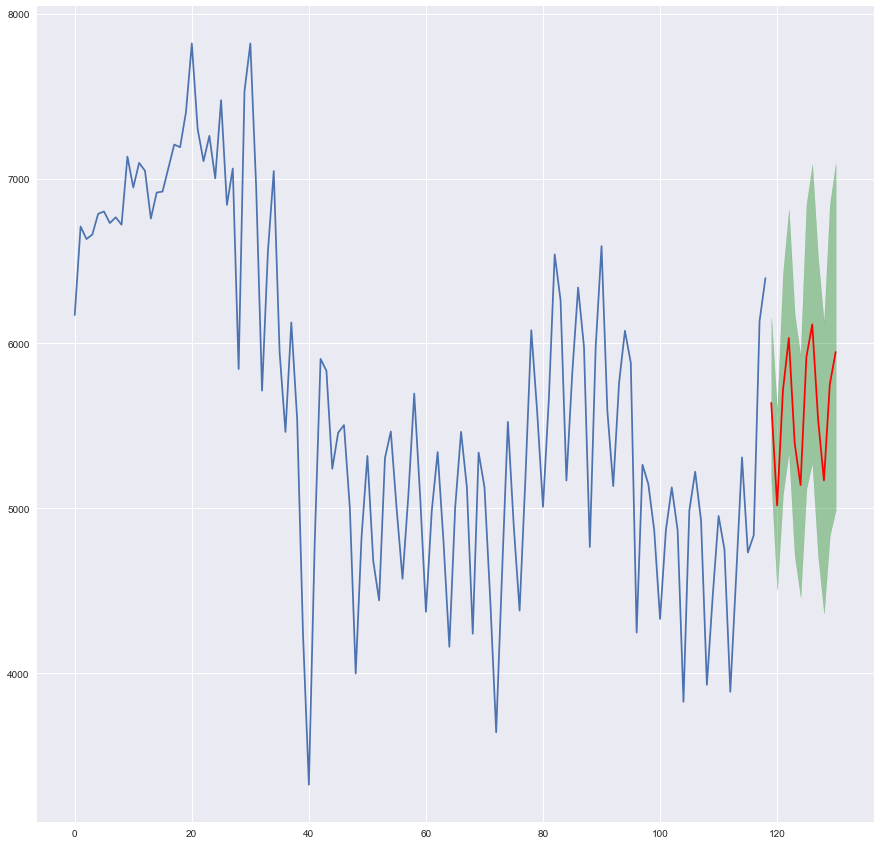

In [74]:
plt.style.use('seaborn')
plt.figure(figsize=(15,15))
plt.plot(df_res.index,df_res['actual'])
plt.plot(df_res.index,df_res['forecast'],color='r')
plt.fill_between(df_res.index,df_res['low'],df_res['high'],alpha=.35,color='g')


plt.legend()